In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [134]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [135]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [136]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [137]:
y = df.Outcome.values
x = df.drop(['Outcome'], axis = 1)
sc = StandardScaler()
X = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=4)

In [138]:
x_train

array([[ 0.63994726, -0.59134489,  0.66661825, ..., -0.15136112,
        -0.88150107,  0.23476686],
       [-0.25095213,  0.84832379, -0.16054575, ...,  0.0644016 ,
        -0.65197205, -0.95646168],
       [ 1.82781311,  0.12848945,  0.04624525, ..., -0.11328534,
        -0.8059981 ,  0.66020563],
       ...,
       [ 0.63994726, -0.43485916,  0.97680475, ...,  0.61015436,
         0.77050385, -0.19067191],
       [-0.54791859, -1.43636781, -0.26394125, ..., -0.29097229,
        -0.30767852, -0.0204964 ],
       [-0.54791859, -0.43485916,  0.25303625, ...,  0.20401277,
        -0.20499449, -0.87137393]])

In [139]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [140]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [141]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [142]:
lam = 0.0001
def Optimization(w, b, X, Y):
    m = X.shape[0]
    
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))  + (lam * (np.sum(w)))
    for weights in w:
          if np.where(weights > 0):
              dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T)) + lam
              db = (1/m)*(np.sum(final_result-Y.T)) + lam
          if np.where(weights < 0):
              dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T)) - lam
              db = (1/m)*(np.sum(final_result-Y.T)) - lam

    grads = {"dw": dw, "db": db}
    return grads, cost
def Update(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = Optimization(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        if (i % 100 == 0):
            costs.append(cost)
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
   
    return coeff, gradient, costs

Optimized weights [[ 0.45687724  0.9624439  -0.28319579 -0.02620796 -0.05436341  0.70851026
   0.34794633  0.24097189]]
Optimized intercept -0.8178909946636285
Test Accuracy 80.20833333333334 %


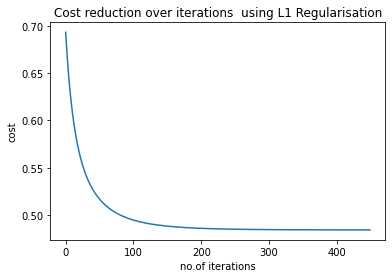

In [143]:
n_features = x_train.shape[1]
w, b = weightInitialization(n_features)
coeff, gradients, costs = Update(w, b, x_train, y_train,learning_rate=0.001,no_iterations=45000)
w1 = coeff["w"]
b1 = coeff["b"]
print('Optimized weights', w1)
print('Optimized intercept',b1)

final_test_pred = sigmoid_activation(np.dot(w1,x_test.T)+b1)
x_ts =  x_test.shape[0]
y_pred = predict(final_test_pred, x_ts)
print('Test Accuracy',accuracy_score(y_pred.T, y_test)*100,'%')
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('no.of iterations')
plt.title('Cost reduction over iterations  using L1 Regularisation')
plt.show()
    
    
 

In [144]:

Pregnancies = int(input("Enter the no.of pregnencies"))
Glucose = int(input("Enter the glucose level"))
BloodPressure = int(input("Enter the Blood Pressure"))
ST = int(input("Enter skin thickness"))
Insulin = int(input("Enter the Insulin level"))
BMI = float(input("Enter BMI"))
DPF = float(input("Enter the value of DiabetesPedigreeFunction"))
Age = int(input("Enter age"))



custom = np.array([[Pregnancies,Glucose,BloodPressure,ST,Insulin,BMI,DPF,Age]])
from sklearn import preprocessing
custom_data = preprocessing.normalize(custom)
Sigmoid = sigmoid_activation(np.dot(w1,custom_data.T)+b1)
x_ts =  custom_data.shape[0]
Prediction = predict(Sigmoid, x_ts)
if(Prediction == 1):
    print("You have Diabetes")
else:
    print("You don't have Diabetes")


 

[[0.03348371 0.8259314  0.40180446 0.19532161 0.         0.19811192
  0.00349905 0.27903088]]
[[1.]]
You have Diabetes
